In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
tedtalk = pd.read_csv('ted.csv')

In [4]:
tedtalk.shape

(2550, 17)

In [5]:
tedtalk.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [6]:
tedtalk.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
tedtalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [8]:
tedtalk.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# Which talks provoke the most online discussion

1. Consider the limitations and biases of your data when analyzing it - sorting by comments does not facilitate the difference in age of video.
2. Make your results understandable - views per comment is more intuitive than comments per view as it is too small. 

In [9]:
tedtalk['name'].groupby(tedtalk['comments']).value_counts().tail(5)

# tedtalk.sort_values('comments').tail()

comments  name                                             
2673      David Chalmers: How do you explain consciousness?    1
2877      Jill Bolte Taylor: My stroke of insight              1
3356      Sam Harris: Science can answer moral questions       1
4553      Ken Robinson: Do schools kill creativity?            1
6404      Richard Dawkins: Militant atheism                    1
Name: name, dtype: int64

In [10]:
# Normalize by views per comment to avoid bias of the videos being up for different durations of time.

tedtalk['views_per_comm'] = tedtalk['views']/tedtalk['comments']

In [62]:
print('Videos with highest views per comment:')
tedtalk['name'].groupby(tedtalk['views_per_comm']).value_counts().head(5)

# tedtalk.sort_values('comms_per_view').tail()

Videos with highest views per comment:


views_per_comm  name                                                      
450.531587      Diane J. Savino: The case for same-sex marriage               1
651.739808      David Bismark: E-voting without fraud                         1
683.134291      Richard Dawkins: Militant atheism                             1
703.886818      Sharmeen Obaid-Chinoy: Inside a school for suicide bombers    1
735.525682      Janet Echelman: Taking imagination seriously                  1
Name: name, dtype: int64

# Visualize the distribution of comments

1. Choose your plot type based on the questions you're answering - frequency distribution is best shown with a histogram.
2. Use pandas one-liners to iterate through plots quickly.
3. Try modifying the plot defaults - alter the passed-in arguments to obtain the best plots.
4. Creating plots involves decision-making - visualization is about summary, cutting out data is natural.

<AxesSubplot:>

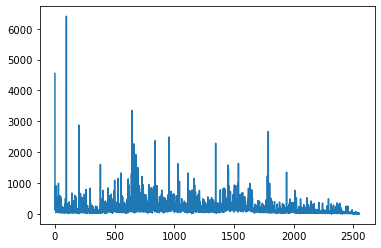

In [12]:
tedtalk['comments'].plot()

> - x-axis is index and y-axis is number of comments.
> - Most talks have a low number of comments, but a line plot is not the best way to show this as this is not a time-series data.

<AxesSubplot:ylabel='Frequency'>

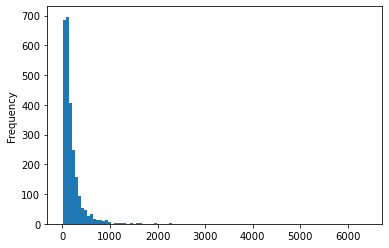

In [13]:
tedtalk['comments'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

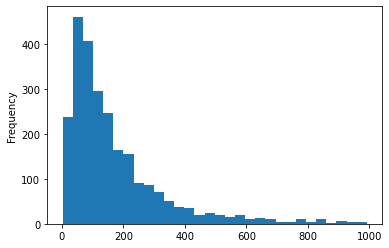

In [14]:
# Take a look at the frequency distribution inside 0 to 1000
tedtalk[tedtalk['comments'] < 1000]['comments'].plot(kind='hist', bins=30)

# tedtalk.query('comments < 1000')['comments'].plot(kind='hist', bins=30)

# The loc method is the best method as it allows you to pass in multiple columns.
# tedtalk.loc[tedtalk['comments']<1000, 'comments'].plot(kind='hist', bins=30)

In [15]:
# Take a look at the data that has been filtered out from the above distribution aka the outliers
tedtalk[tedtalk['comments'] >= 1000].shape

# tedtalk.query('comments >= 1000')['comments'].shape 

# tedtalk.loc[tedtalk['comments']>=1000, 'comments'].shape

(32, 18)

> There are only 32 videos that have more than 1000 comments. These are outliers and they skew the original hist plot if not filtered.

In [16]:
# Normalize the graph using log() to obtain a more informative graph.
tedtalk['comments_log'] = np.log(tedtalk['comments'])

<AxesSubplot:ylabel='Frequency'>

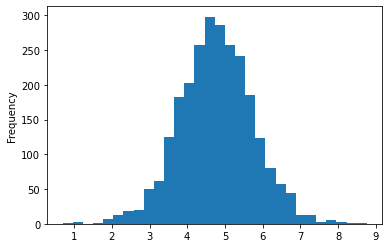

In [17]:
tedtalk['comments_log'].plot(kind='hist', bins=30)

# Plot the number of talks that took place each year

1. Read the documentation.
2. Use the datetime data type for dates and times.
3. Check your work as you go.
4. Consider excluding data if it might not be relevant.

In [18]:
tedtalk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_per_comm,comments_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,8.423542
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,5.579730
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,4.820282
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,5.298317
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,6.385194


In [19]:
tedtalk['event'].sample(10)

201                         TED2008
1585                 TEDGlobal 2013
759                  TEDGlobal 2010
1297    TEDSalon London Spring 2012
1204                        TED2012
2393                  TED Residency
1386                     TEDxEQChCh
2003                        TED2015
884                   TEDWomen 2010
590                   AORN Congress
Name: event, dtype: object

> Not all events have year in the name.

In [20]:
tedtalk['film_date'].sample(10)

672     1265932800
1413    1353024000
1405    1346889600
1798    1407283200
234     1204502400
156      981072000
804     1271376000
847     1291766400
150     1172880000
1344    1346544000
Name: film_date, dtype: int64

> What do these numbers correspond to? Referring to the dataset information on Kaggle, we found out that these integers are Unix timestamps. We can convert this,

In [21]:
# pd.to_datetime normally is able to guess, but for this one we will need to specify the Unix format as unit='s' argument.
tedtalk['film_datetime'] = pd.to_datetime(tedtalk['film_date'], unit='s') 

In [22]:
tedtalk['film_datetime']

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_datetime, Length: 2550, dtype: datetime64[ns]

In [23]:
tedtalk[['event', 'film_datetime']].sample(5)

,event,film_datetime
123,TED2007,2007-03-03
784,TEDxChange,2010-09-20
2265,TEDxDesMoines,2013-09-08
512,TED2006,2006-02-09
47,TED2005,2005-02-23


In [24]:
tedtalk['year'] = tedtalk['film_datetime'].dt.year

# tedtalk['film_datetime'].dt.dayofweek
# tedtalk['film_datetime'].dt.dayofyear

In [25]:
tedtalk['year'].value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: year, dtype: int64

<AxesSubplot:>

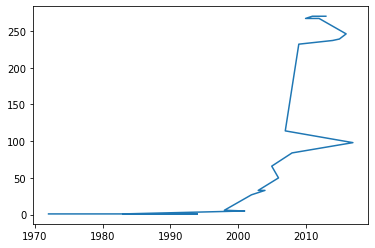

In [26]:
tedtalk['year'].value_counts().plot(kind='line')

Sorting issue as the data is fed from max no. of counts to min no. of counts

In [27]:
#Sort data by index to avoid sorting issues when plotting a lineplot
tedtalk['year'].value_counts().sort_index() 

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: year, dtype: int64

Text(0, 0.5, 'Number of TED Talks')

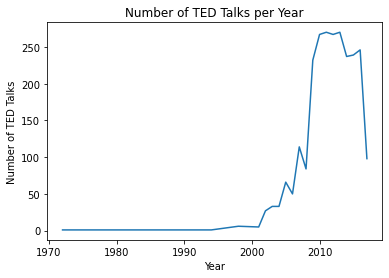

In [61]:
tedtalk['year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of TED Talks per Year')
plt.xlabel('Year')
plt.ylabel('Number of TED Talks')

# What were the "best" events in TED history to attend?

1. Think creatively for how you can use the data you have to answer your question.
2. Watch out for small sample size. 

In [29]:
tedtalk.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,views_per_comm,comments_log,film_datetime,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,10372.745443,8.423542,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,12077.433962,5.579730,2006-02-25,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,13195.903226,4.820282,2006-02-24,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,8487.750000,5.298317,2006-02-26,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,20245.984823,6.385194,2006-02-22,2006


In [30]:
# Top number of talks per event
tedtalk['event'].value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [31]:
# Highest mean views per event
tedtalk.groupby('event')['views'].mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

The TEDxPuget Sound has the most average views per event.

In [32]:
tedtalk.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'views_per_comm', 'comments_log', 'film_datetime',
       'year'],
      dtype='object')

In [57]:
# List out count of view values (aka talks) per event, mean views per event, and sum of views per event. Then, sort by sum and get top 5.
print('TED events with the highest views:')
tedtalk.groupby('event')['views'].agg(['count', 'mean', 'sum']).sort_values(by='sum').tail()

TED events with the highest views:


,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


Caveats/Biases:

1. Sum of views does not account for the age of the videos.
2. High number of views does not necessarily mean that the videos are good.

# Unpack the ratings data

1. Pay attention to data types in pandas.
2. Use apply anytime you want to, if you don't care about performance.

In [34]:
tedtalk.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [35]:
tedtalk['ratings'][0] # is a stringified dictionary

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [36]:
import ast # Abstract Syntax Tree module

In [37]:
# Example:
type(ast.literal_eval('[1, 2, 3, 4]')) # ast.literal_eval() takes in a string that looks like a list and returns a list

list

In [38]:
# Convert the string into a list of dictionary for the [0] 
ast.literal_eval(tedtalk['ratings'][0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [39]:
# Do this for the whole dataframe instead
tedtalk['ratings'].apply(ast.literal_eval)

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [40]:
tedtalk['ratings_list'] = tedtalk['ratings'].apply(ast.literal_eval)

# Count the total number of ratings received by each talk

In [41]:
# Function for tallying the number of ratings
def sum_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d['count'] # adds d['count'] to prev tally
    return num

In [42]:
# Test on one sample
sum_ratings(tedtalk['ratings_list'][1]) # Test on one sample

2936

In [43]:
# Apply on all values in the main dataframe and assign the values to a new column
tedtalk['total_ratings'] = tedtalk['ratings_list'].apply(sum_ratings)

# Which occupations deliver the funniest TED Talks on average?

In [44]:
tedtalk.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'views_per_comm', 'comments_log', 'film_datetime',
       'year', 'ratings_list', 'total_ratings'],
      dtype='object')

In [45]:
tedtalk['ratings_list']

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings_list, Length: 2550, dtype: object

In [46]:
tedtalk['ratings_list'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [47]:
tedtalk['ratings_list'][0][0] # This won't work as not all ratings dictionary start with Funny

{'id': 7, 'name': 'Funny', 'count': 19645}

In [48]:
tedtalk['ratings'].str.contains('Funny').value_counts() # Every sample contains Funny rating

True    2550
Name: ratings, dtype: int64

In [49]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [50]:
tedtalk['funny_ratings'] = tedtalk['ratings_list'].apply(get_funny_ratings)
tedtalk['funny_ratings'].sort_values().tail()

# Keep in mind that the first column below is the index.

675      5552
1129     7315
2161     7445
2114     7731
0       19645
Name: funny_ratings, dtype: int64

In [51]:
# Calculate percentage of Funny ratings out of overall ratings
tedtalk['funny_percentage'] = tedtalk['funny_ratings'] / tedtalk['total_ratings']

In [52]:
tedtalk['funny_percentage'].sort_values().tail()

2114    0.625182
173     0.629662
747     0.630677
1398    0.669927
685     0.702076
Name: funny_percentage, dtype: float64

In [53]:
tedtalk.sort_values('funny_percentage')['speaker_occupation'].tail(10)

568                        Comedian
675                  Data scientist
21             Humorist, web artist
194                        Jugglers
2273            Comedian and writer
2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [59]:
# Groupby speaker occupation, and aggregate by mean funny rating.
print('Top humorous speakers by occupation:')
tedtalk.groupby('speaker_occupation')['funny_percentage'].agg('mean').sort_values().tail(10)

Top humorous speakers by occupation:


speaker_occupation
Science humorist               0.468405
Social energy entrepreneur     0.502117
Comedian, voice artist         0.503542
Cartoon editor                 0.511628
Satirist                       0.512383
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_percentage, dtype: float64